In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)


house=pd.read_csv("HousePrices.csv",sep=";")
aa=np.array(house)
house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.000,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.000,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,nan,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.000,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.000,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


## satır ve sütun sayısı ve her bir sütunun türü:

In [2]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## ilk 5 satırı döndürür.

In [3]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## benzersiz değerlerin sayısına bakmak:

In [4]:
house.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
                 ... 
BedroomAbvGr        8
KitchenAbvGr        4
KitchenQual         4
TotRmsAbvGrd       12
Functional          7
Fireplaces          4
FireplaceQu         5
GarageType          6
GarageYrBlt        97
GarageFinish        3
GarageCars          5
GarageArea        441
GarageQual          5
GarageCond          5
PavedDrive

## street(sokak) kategorik değişkenine bağlı olarak satış fiyatlarının ortalaması:

In [5]:
house.groupby(by='Street')['SalePrice'].mean()

Street
Grvl   130190.500
Pave   181130.539
Name: SalePrice, dtype: float64

## neighborhood(muhit) kategorik değişkenine bağlı olarak satış fiyatlarının ortalaması:

In [6]:
house.groupby(by='Neighborhood')['SalePrice'].mean()

Neighborhood
Blmngtn   194870.882
Blueste   137500.000
BrDale    104493.750
BrkSide   124834.052
ClearCr   212565.429
CollgCr   197965.773
Crawfor   210624.725
Edwards   128219.700
Gilbert   192854.506
IDOTRR    100123.784
MeadowV    98576.471
Mitchel   156270.122
NAmes     145847.080
NPkVill   142694.444
NWAmes    189050.068
NoRidge   335295.317
NridgHt   316270.623
OldTown   128225.301
SWISU     142591.360
Sawyer    136793.135
SawyerW   186555.797
Somerst   225379.837
StoneBr   310499.000
Timber    242247.447
Veenker   238772.727
Name: SalePrice, dtype: float64

## garagetype(garaj tipi) kategorik değişkenine bağlı olarak satış fiyatlarının ortalaması:


In [7]:
house.groupby(by='GarageType')['SalePrice'].mean()

GarageType
2Types    151283.333
Attchd    202892.656
Basment   160570.684
BuiltIn   254751.739
CarPort   109962.111
Detchd    134091.163
Name: SalePrice, dtype: float64

## bldgtype(bina tipi) kategorik değişkenine bağlı olarak satış fiyatlarının ortalaması:


In [8]:
house.groupby(by='BldgType')['SalePrice'].mean()

BldgType
1Fam     185763.807
2fmCon   128432.258
Duplex   133541.077
Twnhs    135911.628
TwnhsE   181959.342
Name: SalePrice, dtype: float64

## satış fiyatlarının kategorize edilmesi:
## 1) 500000'den yüksek fiyatlı evlerin sayısı
## 2) 100000'den yüksek fiyatlı evlerin sayısı
## 3) 100000'den düşük fiyatlı evlerin sayısı

In [9]:
def fiyatlari_kategorize_et(adet):
    if adet >= 500000:
        return 1
    elif adet >= 100000:
        return 2
    else:
        return 3

In [10]:
house['Street'] = house['SalePrice'].apply(fiyatlari_kategorize_et)
display(house.head())
house.groupby("Street")["SalePrice"].count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,2,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,2,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,2,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,2,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,2,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Street
1       9
2    1337
3     114
Name: SalePrice, dtype: int64

## eksik değerlerin tespit edilmesi

In [11]:
house.isnull().head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


## 1.5*standart sapma değerine sahip, saleprice değişkenine ait aykırı değerlerin gösterimi:

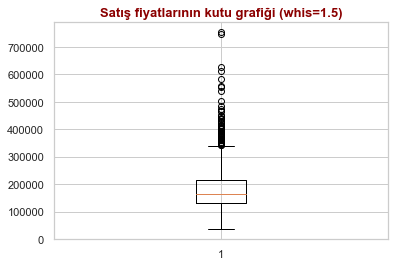

In [12]:
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.boxplot(house["SalePrice"], )
plt.title("Satış fiyatlarının kutu grafiği (whis=1.5)", fontdict=baslik_font)
plt.show()

## 5*standart sapma değerine sahip, saleprice değişkenine ait aykırı değerlerin gösterimi:

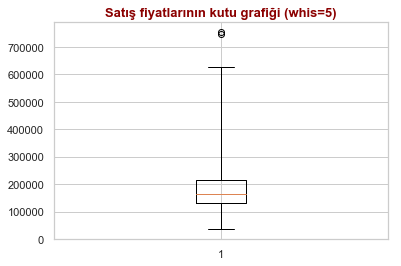

In [13]:
plt.boxplot(house["SalePrice"], whis=5)
plt.title("Satış fiyatlarının kutu grafiği (whis=5)", fontdict=baslik_font)
plt.show()

## 10*standart sapma değerine sahip, saleprice değişkenine ait aykırı değerlerin gösterimi:


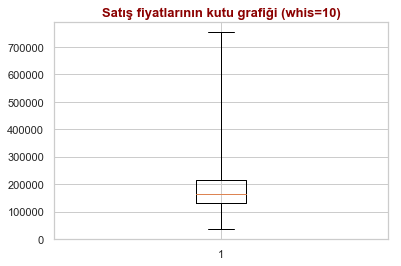

In [14]:
plt.boxplot(house["SalePrice"], whis=10)
plt.title("Satış fiyatlarının kutu grafiği (whis=10)", fontdict=baslik_font)
plt.show()

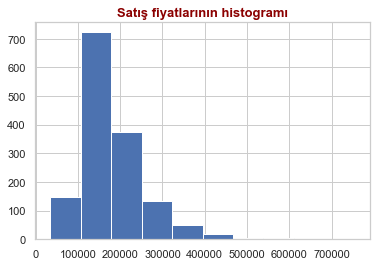

In [15]:
plt.hist(house["SalePrice"])
plt.title("Satış fiyatlarının histogramı", fontdict=baslik_font)
plt.show()

## z-score yöntemi ile aykırı değerlerin saptanması

In [16]:
from scipy.stats import zscore

z_scores = zscore(house["SalePrice"])
for threshold in range(1,5):
    print("Eşik değeri: {}".format(threshold))
    print("Aykırı değerlerin sayısı: {}".format(len((np.where(z_scores > threshold)[0]))))
    print('------')

Eşik değeri: 1
Aykırı değerlerin sayısı: 191
------
Eşik değeri: 2
Aykırı değerlerin sayısı: 63
------
Eşik değeri: 3
Aykırı değerlerin sayısı: 22
------
Eşik değeri: 4
Aykırı değerlerin sayısı: 9
------


## Tukey yöntemi ile aykırı değerlerin saptanması

In [17]:
q75, q25 = np.percentile(house["SalePrice"], [75 ,25])
caa = q75 - q25

In [18]:
import pandas as pd
esik_degerleri = pd.DataFrame()

for esik_degeri in np.arange(1,5,0.5):
    min_deger = q25 - (caa*esik_degeri)
    maks_deger = q75 + (caa*esik_degeri)
    aykiri_deger_sayisi = len((np.where((house["SalePrice"] > maks_deger)| 
                                       (house["SalePrice"] < min_deger))[0]))
    esik_degerleri = esik_degerleri.append({'esik_degeri': esik_degeri,'aykiri_deger_sayısı': aykiri_deger_sayisi}, 
                                           ignore_index=True)
esik_degerleri

,aykiri_deger_sayısı,esik_degeri
0,121.000,1.000
1,61.000,1.500
2,38.000,2.000
3,21.000,2.500
4,12.000,3.000
5,8.000,3.500
6,7.000,4.000
7,4.000,4.500


## Aykırı değerlerin sınırlandırılması: winsorization

In [19]:
from scipy.stats.mstats import winsorize

winsorize_SalePrice = winsorize(house["SalePrice"], (0, 0.10))

winsorize_SalePrice

masked_array(data=[208500, 181500, 223500, ..., 266500, 142125, 147500],
             mask=False,
       fill_value=999999,
            dtype=int64)

burada whis değeri aynı olduğu halde veri winsorize edildiği için aykırı değerler sınırlandırılmış oldu:

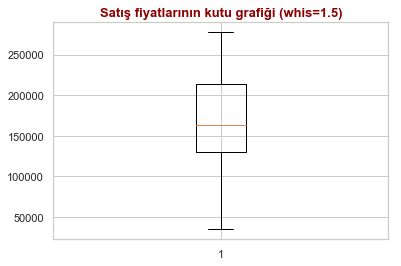

In [20]:
plt.boxplot(winsorize_SalePrice)
plt.title("Satış fiyatlarının kutu grafiği (whis=1.5)", fontdict=baslik_font)
plt.show()

## ayrkırı değerlerin dönüştürülmesi:

bu dönüşüm ile satış fiyatlarına ait dağılım normal dağılıma yakınlaşmaya başladı

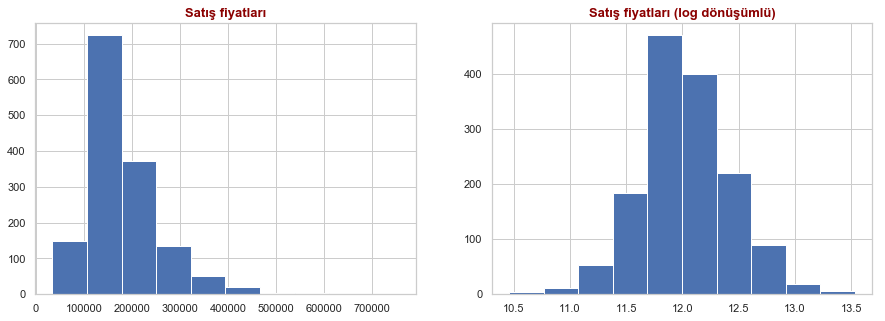

In [21]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(house["SalePrice"])
plt.title("Satış fiyatları", fontdict=baslik_font)

plt.subplot(1,2,2)
plt.hist(np.log(house["SalePrice"]))
plt.title("Satış fiyatları (log dönüşümlü)", fontdict=baslik_font)
plt.show()

burada elde ettiğimiz normal dağılıma yakın verinin aykırı değerler üzerindeki etkisine baktığımızda log dönüşümünün değer aralığını daralttığını göstermektedir:

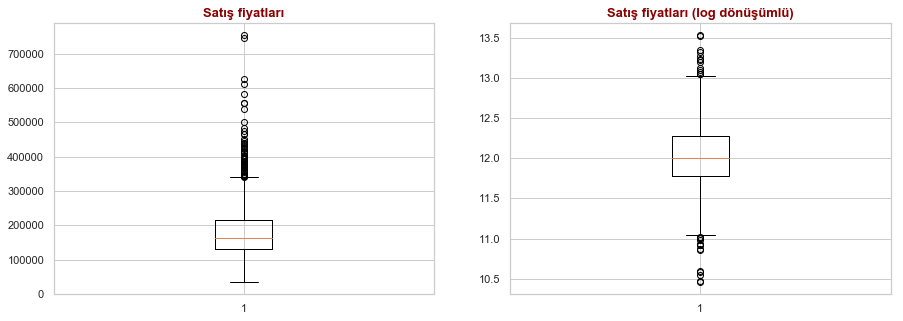

In [22]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(house["SalePrice"])
plt.title("Satış fiyatları", fontdict=baslik_font)

plt.subplot(1,2,2)
plt.boxplot(np.log(house["SalePrice"]))
plt.title("Satış fiyatları (log dönüşümlü)", fontdict=baslik_font)
plt.show()

## tukey yöntemi ile incelersek:

In [23]:
q75_log, q25_log = np.percentile(np.log(house["SalePrice"]), [75 ,25])
caa_log = q75_log - q25_log

In [24]:
log_esik_degerleri = pd.DataFrame(columns=['esik_degeri', 'aykiri_deger_sayisi', 'aykiri_deger_sayisi_log'])

for esik_degeri in np.arange(1,5,0.5):
    min_deger_log = q25_log - (caa_log*esik_degeri) 
    maks_deger_log = q75_log + (caa_log*esik_degeri)
    min_deger = q25 - (caa*esik_degeri) #log dönüşümü olmadan
    maks_deger = q75 + (caa*esik_degeri) #log dönüşümü olmadan
    
    aykiri_deger_sayisi_log = len((np.where((np.log(house["SalePrice"]) > maks_deger_log)| 
                                       (np.log(house["SalePrice"]) < min_deger_log))[0]))
    aykiri_deger_sayisi = len((np.where((house["SalePrice"] > maks_deger)| 
                                       (house["SalePrice"] < min_deger))[0]))
    log_esik_degerleri = log_esik_degerleri.append({'esik_degeri': esik_degeri,
                                                    'aykiri_deger_sayisi' : aykiri_deger_sayisi, #log dönüşümü olmadan
                                                    'aykiri_deger_sayisi_log': aykiri_deger_sayisi_log 
                                                    }, ignore_index=True)
log_esik_degerleri

,esik_degeri,aykiri_deger_sayisi,aykiri_deger_sayisi_log
0,1.000,121.000,83.000
1,1.500,61.000,28.000
2,2.000,38.000,10.000
3,2.500,21.000,4.000
4,3.000,12.000,0.000
5,3.500,8.000,0.000
6,4.000,7.000,0.000
7,4.500,4.000,0.000


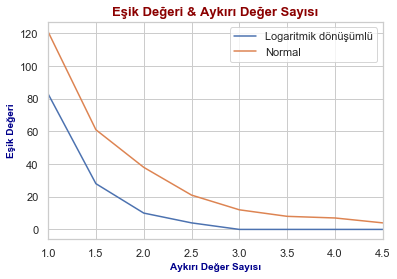

In [25]:
log_esik_degerleri.plot(x = 'esik_degeri', y=['aykiri_deger_sayisi_log', 'aykiri_deger_sayisi'])
plt.title('Eşik Değeri & Aykırı Değer Sayısı', fontdict=baslik_font )
plt.ylabel('Eşik Değeri', fontdict=eksen_font )
plt.xlabel('Aykırı Değer Sayısı', fontdict=eksen_font )
plt.legend(('Logaritmik dönüşümlü', 'Normal'))
plt.show()

## SalePrice, GarageArea ve LotArea değişkenlerini %90'lık yüzde ile winsorize edilmesi:

In [26]:
house["winsorize_SalePrice"] = winsorize(house["SalePrice"], (0, 0.10))
house["winsorize_GarageArea"] = winsorize(house["GarageArea"], (0, 0.10))
house["winsorize_LotArea"] = winsorize(house["LotArea"], (0, 0.10))

aşağıdaki winsorize işleminde görüldüğü üzere, SalePrice'ın ortalaması 180921 iken, winsorize varyantı için 173020'dir. bu da aykırı değerlerin tanımlayıcı istatistikleri nasıl etkilediğinin bir göstergesidir.

In [27]:
pd.options.display.float_format = '{:.3f}'.format
for i in range(0, len(house.Street)):
    if pd.isnull(house.Street[i]):
        house.Street[i] = house.Street[i-1]
        
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,winsorize_SalePrice,winsorize_GarageArea,winsorize_LotArea
count,1460.000,1460.000,1201.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1452.000,...,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,730.500,56.897,70.050,10516.828,2.072,6.099,5.575,1971.268,1984.866,103.685,...,3.410,15.061,2.759,43.489,6.322,2007.816,180921.196,173020.252,461.001,9417.278
std,421.610,42.301,24.285,9981.265,0.281,1.383,1.113,30.203,20.645,181.066,...,29.317,55.757,40.177,496.123,2.704,1.328,79442.503,58293.997,189.798,3166.991
min,1.000,20.000,21.000,1300.000,1.000,1.000,1.000,1872.000,1950.000,0.000,...,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000,34900.000,0.000,1300.000
25%,365.750,20.000,59.000,7553.500,2.000,5.000,5.000,1954.000,1967.000,0.000,...,0.000,0.000,0.000,0.000,5.000,2007.000,129975.000,129975.000,334.500,7553.500
50%,730.500,50.000,69.000,9478.500,2.000,6.000,5.000,1973.000,1994.000,0.000,...,0.000,0.000,0.000,0.000,6.000,2008.000,163000.000,163000.000,480.000,9478.500
75%,1095.250,70.000,80.000,11601.500,2.000,7.000,6.000,2000.000,2004.000,166.000,...,0.000,0.000,0.000,0.000,8.000,2009.000,214000.000,214000.000,576.000,11601.500
max,1460.000,190.000,313.000,215245.000,3.000,10.000,9.000,2010.000,2010.000,1600.000,...,508.000,480.000,738.000,15500.000,12.000,2010.000,755000.000,278000.000,757.000,14375.000


In [28]:
house.describe(include=['O'])

,MSZoning,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,...,6,3,5,5,3,3,4,4,9,6
top,RL,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,50,925,1311,1459,1052,1382,225,1260,1445,...,870,605,1311,1326,1340,3,157,49,1267,1198


## aşağıdaki grafiklerde winsorize edilmiş ve log dönüşümü uygulanmış verinin dağılımının giderek normal dağılıma yaklaştığını görüyoruz:

ValueError: supplied range of [-inf, 7.257002707092073] is not finite

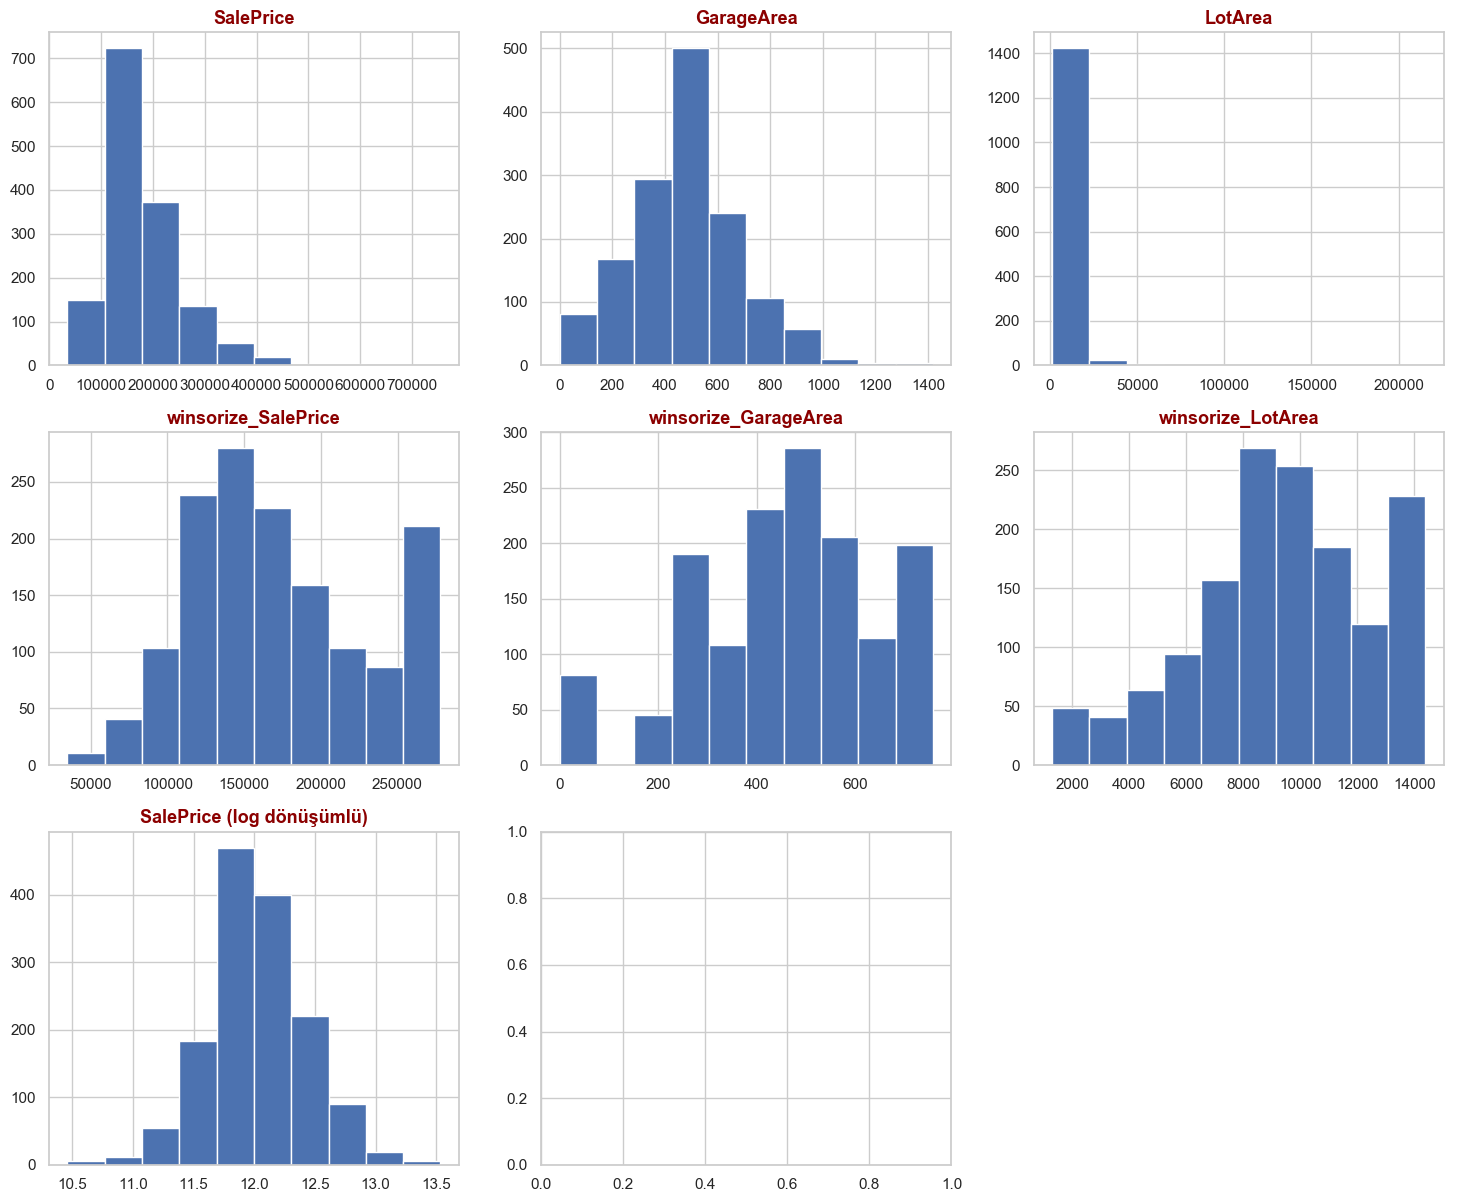

In [29]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

plt.figure(figsize=(18,15))
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

degiskenler = ['SalePrice', 'GarageArea','LotArea']
winsorize_degiskenler = ['winsorize_SalePrice', 'winsorize_GarageArea','winsorize_LotArea']

for i in range(3):
    plt.subplot(3, 3, i+1)
    plt.hist(house[degiskenler[i]])
    plt.title(degiskenler[i], fontdict=baslik_font)
    
for i in range(3):
    plt.subplot(3, 3, i+4)
    plt.hist(house[winsorize_degiskenler[i]])
    plt.title(winsorize_degiskenler[i], fontdict=baslik_font)
    
for i in range(3):
    plt.subplot(3, 3, i+7)
    plt.hist(np.log(house[degiskenler[i]]))
    plt.title(degiskenler[i] + ' (log dönüşümlü)', fontdict=baslik_font)

## kategorik değerlerin görselleştirilmesi:

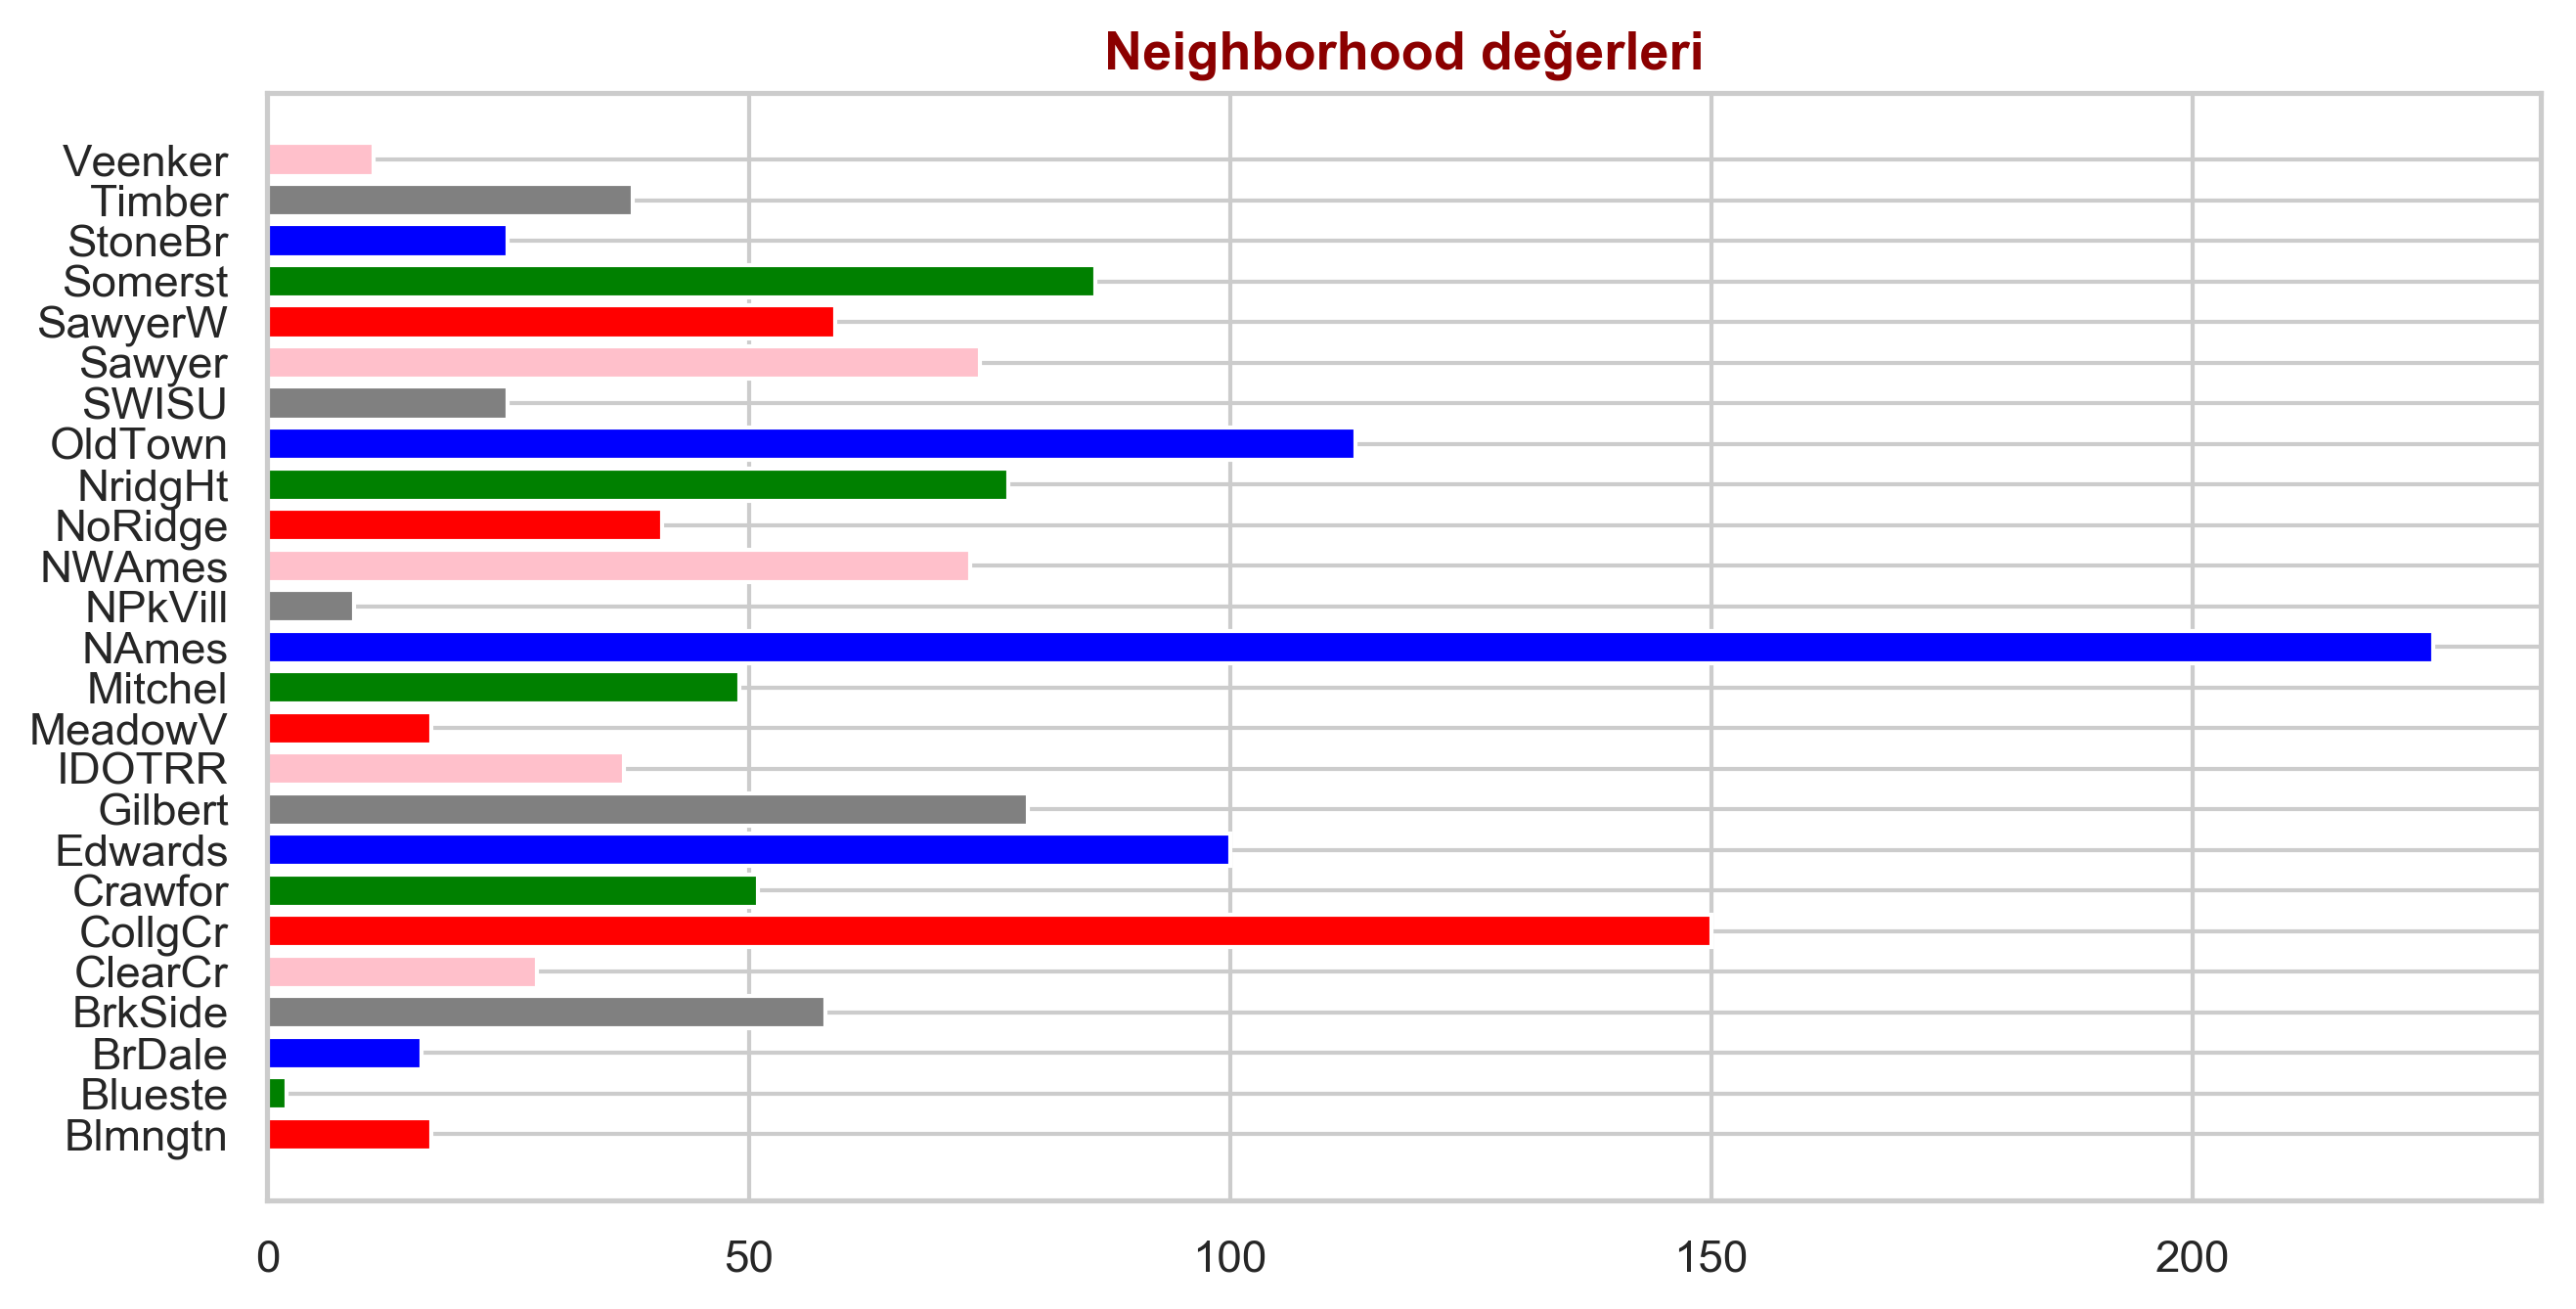

In [30]:
plt.figure(figsize=(10,5), dpi=300)
plt.barh(house.groupby("Neighborhood")["Neighborhood"].count().index, 
        house.groupby("Neighborhood")["Neighborhood"].count(), 
        color=["red","green","blue","grey","pink"])
plt.title("Neighborhood değerleri", fontdict=baslik_font)

plt.show()


SalePrice, GarageArea ve LotArea arasındaki ilişkilerin ikili olarak görselleştirilmesi:

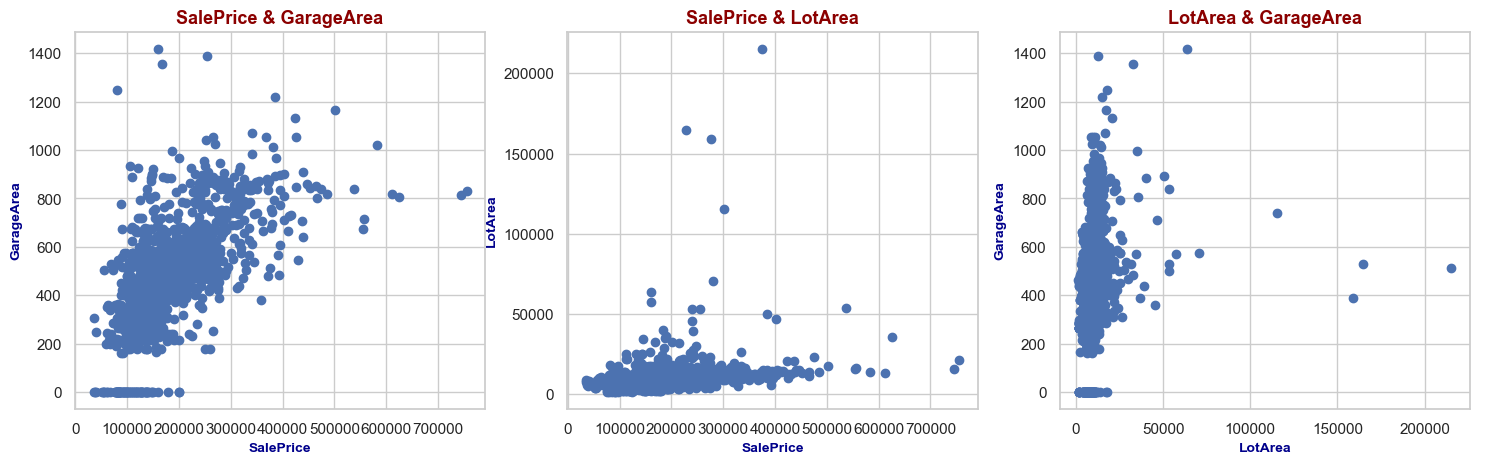

In [31]:
plt.figure(figsize=(18,5))
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.subplot(1,3,1)
plt.scatter(house["SalePrice"], house["GarageArea"])
plt.title("SalePrice & GarageArea", fontdict=baslik_font)
plt.xlabel('SalePrice', fontdict=eksen_font )
plt.ylabel('GarageArea', fontdict=eksen_font )


plt.subplot(1,3,2)
plt.scatter(house["SalePrice"], house["LotArea"])
plt.title("SalePrice & LotArea", fontdict=baslik_font)
plt.xlabel('SalePrice', fontdict=eksen_font )
plt.ylabel('LotArea', fontdict=eksen_font )

plt.subplot(1,3,3)
plt.scatter(house["LotArea"], house["GarageArea"])
plt.title("LotArea & GarageArea", fontdict=baslik_font)
plt.xlabel('LotArea', fontdict=eksen_font )
plt.ylabel('GarageArea', fontdict=eksen_font )

plt.show()

## korelasyon katsayısı

In [32]:
house.corr()

,Id,MSSubClass,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,winsorize_SalePrice,winsorize_GarageArea,winsorize_LotArea
Id,1.000,0.011,-0.011,-0.033,-0.021,-0.028,0.013,-0.013,-0.022,-0.050,...,-0.047,0.001,0.057,-0.006,0.021,0.001,-0.022,-0.022,0.009,-0.011
MSSubClass,0.011,1.000,-0.386,-0.140,0.073,0.033,-0.059,0.028,0.041,0.023,...,-0.044,-0.026,0.008,-0.008,-0.014,-0.021,-0.084,-0.080,-0.097,-0.435
LotFrontage,-0.011,-0.386,1.000,0.426,-0.209,0.252,-0.059,0.123,0.089,0.193,...,0.070,0.041,0.206,0.003,0.011,0.007,0.352,0.353,0.314,0.643
LotArea,-0.033,-0.140,0.426,1.000,-0.122,0.106,-0.006,0.014,0.014,0.104,...,0.020,0.043,0.078,0.038,0.001,-0.014,0.264,0.258,0.168,0.490
Street,-0.021,0.073,-0.209,-0.122,1.000,-0.397,-0.145,-0.298,-0.299,-0.173,...,-0.030,-0.089,-0.051,0.010,-0.010,0.035,-0.467,-0.477,-0.372,-0.245
OverallQual,-0.028,0.033,0.252,0.106,-0.397,1.000,-0.092,0.572,0.551,0.412,...,0.030,0.065,0.065,-0.031,0.071,-0.027,0.791,0.812,0.565,0.233
OverallCond,0.013,-0.059,-0.059,-0.006,-0.145,-0.092,1.000,-0.376,0.074,-0.128,...,0.026,0.055,-0.002,0.069,-0.004,0.044,-0.078,-0.068,-0.149,-0.022
YearBuilt,-0.013,0.028,0.123,0.014,-0.298,0.572,-0.376,1.000,0.593,0.316,...,0.031,-0.050,0.005,-0.034,0.012,-0.014,0.523,0.593,0.500,0.080
YearRemodAdd,-0.022,0.041,0.089,0.014,-0.299,0.551,0.074,0.593,1.000,0.180,...,0.045,-0.039,0.006,-0.010,0.021,0.036,0.507,0.572,0.380,0.064
MasVnrArea,-0.050,0.023,0.193,0.104,-0.173,0.412,-0.128,0.316,0.180,1.000,...,0.019,0.061,0.012,-0.030,-0.006,-0.008,0.477,0.408,0.346,0.165


## korelasyon matrisi 

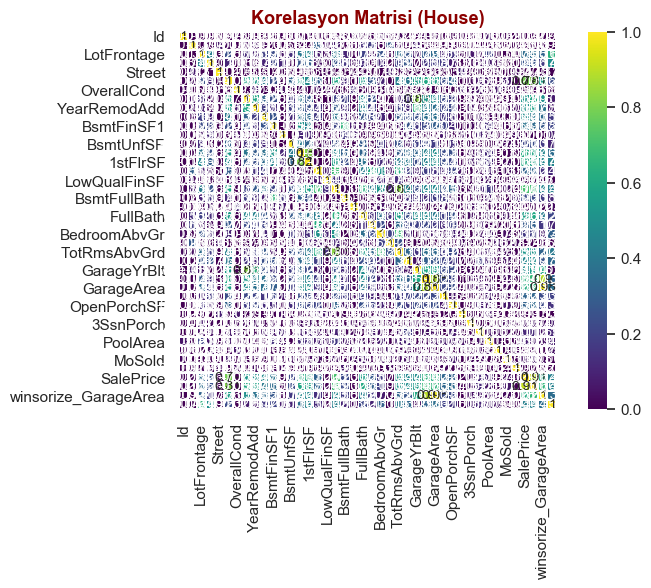

In [33]:
korelasyon_mat_house = house.corr()
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.heatmap(korelasyon_mat_house, square=True, annot=True, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.title("Korelasyon Matrisi (House)", fontdict=baslik_font)
plt.show()

In [34]:
house.groupby("Street").mean()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,winsorize_SalePrice,winsorize_GarageArea,winsorize_LotArea
Street,,,,,,,,,,,,,,,,,,,,,
1,798.333,46.667,98.778,22460.222,9.333,5.111,2002.889,2003.556,610.111,1383.667,...,0.000,63.556,61.667,0.000,4.778,2008.111,607889.778,278000.000,743.000,14159.444
2,732.260,56.088,71.242,10729.337,6.224,5.631,1973.607,1986.512,106.455,462.786,...,3.723,15.929,2.598,42.491,6.351,2007.797,186554.286,180147.128,478.898,9591.684
3,704.500,67.193,55.248,7081.614,4.377,4.956,1941.342,1964.088,31.412,144.877,...,0.000,1.053,0.000,58.632,6.105,2008.009,81147.877,81147.877,228.833,6997.447


fiyatların düşmesi ortalamaları da düşürmektedir:

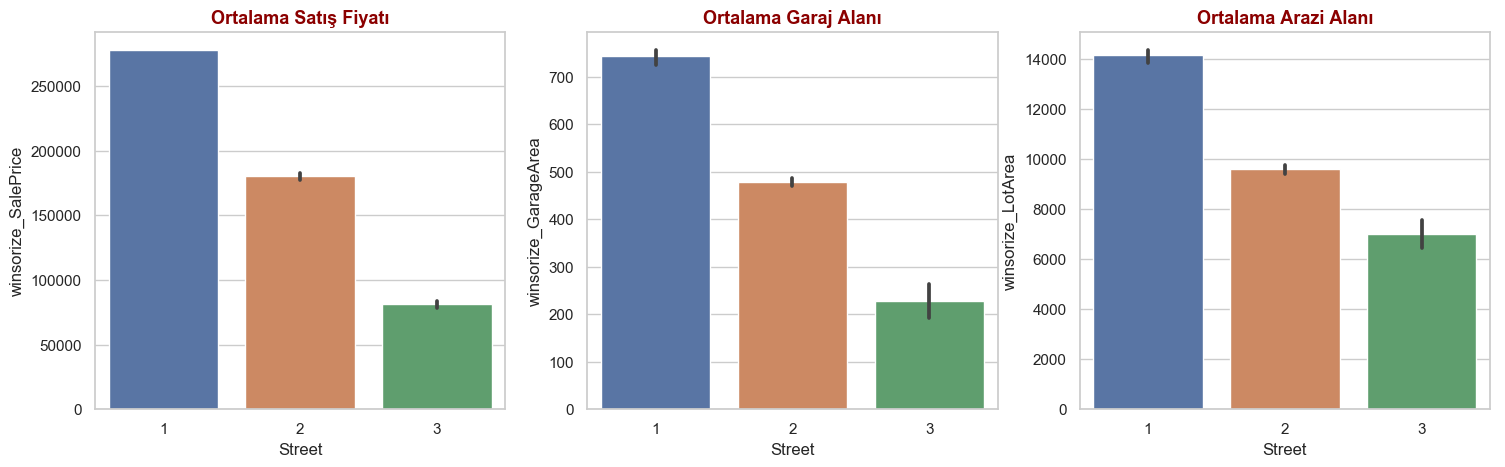

In [35]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(house["Street"], house["winsorize_SalePrice"])
plt.title("Ortalama Satış Fiyatı", fontdict = baslik_font)

plt.subplot(1,3,2)
sns.barplot(house["Street"], house["winsorize_GarageArea"])
plt.title("Ortalama Garaj Alanı", fontdict = baslik_font)

plt.subplot(1,3,3)
# draw the heatmap using seaborn.
sns.barplot(house["Street"], house["winsorize_LotArea"])
plt.title("Ortalama Arazi Alanı", fontdict = baslik_font)

plt.show()

## Kategorik değişkenler:

In [36]:
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

pd.get_dummies(house["Street"]).head()

,1,2,3
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [37]:
house= pd.concat([house, pd.get_dummies(house["Street"])], axis=1)
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,YrSold,SaleType,SaleCondition,SalePrice,winsorize_SalePrice,winsorize_GarageArea,winsorize_LotArea,1,2,3
0,1,60,RL,65.000,8450,2,NaN,Reg,Lvl,AllPub,...,2008,WD,Normal,208500,208500,548,8450,0,1,0
1,2,20,RL,80.000,9600,2,NaN,Reg,Lvl,AllPub,...,2007,WD,Normal,181500,181500,460,9600,0,1,0
2,3,60,RL,68.000,11250,2,NaN,IR1,Lvl,AllPub,...,2008,WD,Normal,223500,223500,608,11250,0,1,0
3,4,70,RL,60.000,9550,2,NaN,IR1,Lvl,AllPub,...,2006,WD,Abnorml,140000,140000,642,9550,0,1,0
4,5,60,RL,84.000,14260,2,NaN,IR1,Lvl,AllPub,...,2008,WD,Normal,250000,250000,757,14260,0,1,0


P-değerleri sıfırdır ve bu da log dönüştürülmüş değişkenlerin hala normal dağılmadığını gösterir:

In [38]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

pd.options.display.float_format = '{:.5f}'.format

ozellikler = ["SalePrice", "GarageArea", "LotArea"]
dagilim_testleri = pd.DataFrame(columns=['ozellik', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for ozellik in ozellikler:
    jb_stats = jarque_bera(np.log(house[ozellik]))
    norm_stats = normaltest(np.log(house[ozellik]))
    dagilim_testleri = dagilim_testleri.append({"ozellik": ozellik,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testleri

,ozellik,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,SalePrice,42.76727,0.00000,25.50701,0.00000
1,GarageArea,nan,nan,nan,nan
2,LotArea,1344.50420,0.00000,164.29764,0.00000


## veri kümesindeki değerlerin winsorize ile tekrar normalleştirilmesi:

In [39]:
from sklearn.preprocessing import normalize

house["norm_winsorize_SalePrice"] = normalize(np.array(house["winsorize_SalePrice"]).reshape(1,-1)).reshape(-1,1)
house["norm_winsorize_GarageArea"] = normalize(np.array(house["winsorize_GarageArea"]).reshape(1,-1)).reshape(-1,1)
house["norm_winsorize_LotArea"] = normalize(np.array(house["winsorize_LotArea"]).reshape(1,-1)).reshape(-1,1)
normal_ozellikler=["winsorize_SalePrice","norm_winsorize_SalePrice","winsorize_GarageArea","norm_winsorize_GarageArea",
                    "winsorize_LotArea","norm_winsorize_LotArea"]


print('Minimum Değer\n-----------------',)
print(house[normal_ozellikler].min())
print('\nMaksimum Değer\n-----------------',)
print(house[normal_ozellikler].max())

Minimum Değer
-----------------
winsorize_SalePrice         34900.00000
norm_winsorize_SalePrice        0.00500
winsorize_GarageArea            0.00000
norm_winsorize_GarageArea       0.00000
winsorize_LotArea            1300.00000
norm_winsorize_LotArea          0.00342
dtype: float64

Maksimum Değer
-----------------
winsorize_SalePrice         278000.00000
norm_winsorize_SalePrice         0.03985
winsorize_GarageArea           757.00000
norm_winsorize_GarageArea        0.03974
winsorize_LotArea            14375.00000
norm_winsorize_LotArea           0.03787
dtype: float64


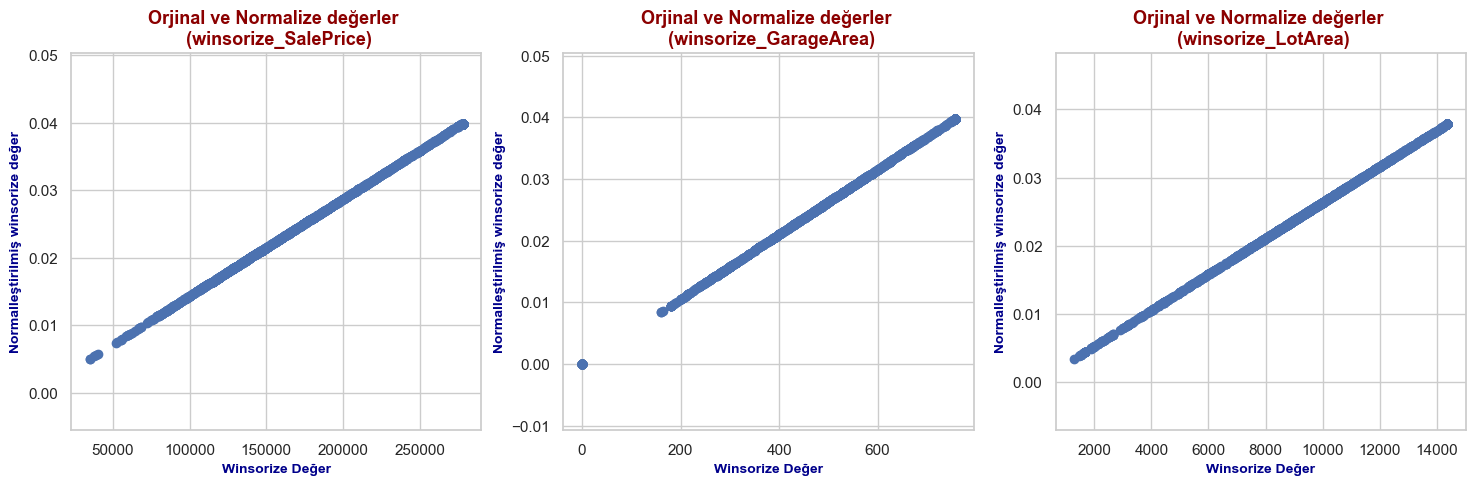

In [40]:
plt.figure(figsize=(18,5))

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.scatter(house[normal_ozellikler[2*i]], house[normal_ozellikler[2*i+1]])
    plt.title("Orjinal ve Normalize değerler \n ({})".format(normal_ozellikler[2*i]), fontdict=baslik_font)
    plt.xlabel("Winsorize Değer", fontdict=eksen_font)
    plt.ylabel("Normalleştirilmiş winsorize değer", fontdict=eksen_font)

plt.show()

standartlaştırırsak:

In [41]:
from sklearn.preprocessing import scale

house["olcekli_winsorize_SalePrice"] = scale(house["winsorize_SalePrice"])
house["olcekli_winsorize_GarageArea"] = scale(house["winsorize_GarageArea"])
house["olcekli_winsorize_LotArea"] = scale(house["winsorize_LotArea"])
olcekli_ozellikler=["winsorize_SalePrice","olcekli_winsorize_SalePrice","winsorize_GarageArea",
                    "olcekli_winsorize_GarageArea","winsorize_LotArea","olcekli_winsorize_LotArea"]
                    

aldığımız kümeler için, burada ortalamalar 0 ve standart sapmalar 1 oldu:

In [42]:
print('Standart Sapmalar\n-----------------',)
print(house[olcekli_ozellikler].std())
print('\nOrtalamalar\n-----------------',)
print(house[olcekli_ozellikler].mean())

Standart Sapmalar
-----------------
winsorize_SalePrice            58293.99689
olcekli_winsorize_SalePrice        1.00034
winsorize_GarageArea             189.79842
olcekli_winsorize_GarageArea       1.00034
winsorize_LotArea               3166.99143
olcekli_winsorize_LotArea          1.00034
dtype: float64

Ortalamalar
-----------------
winsorize_SalePrice            173020.25205
olcekli_winsorize_SalePrice         0.00000
winsorize_GarageArea              461.00068
olcekli_winsorize_GarageArea        0.00000
winsorize_LotArea                9417.27808
olcekli_winsorize_LotArea           0.00000
dtype: float64


grafik olarak görselleştirdiğimizde, normalleştirmenin arttığını görüyoruz:

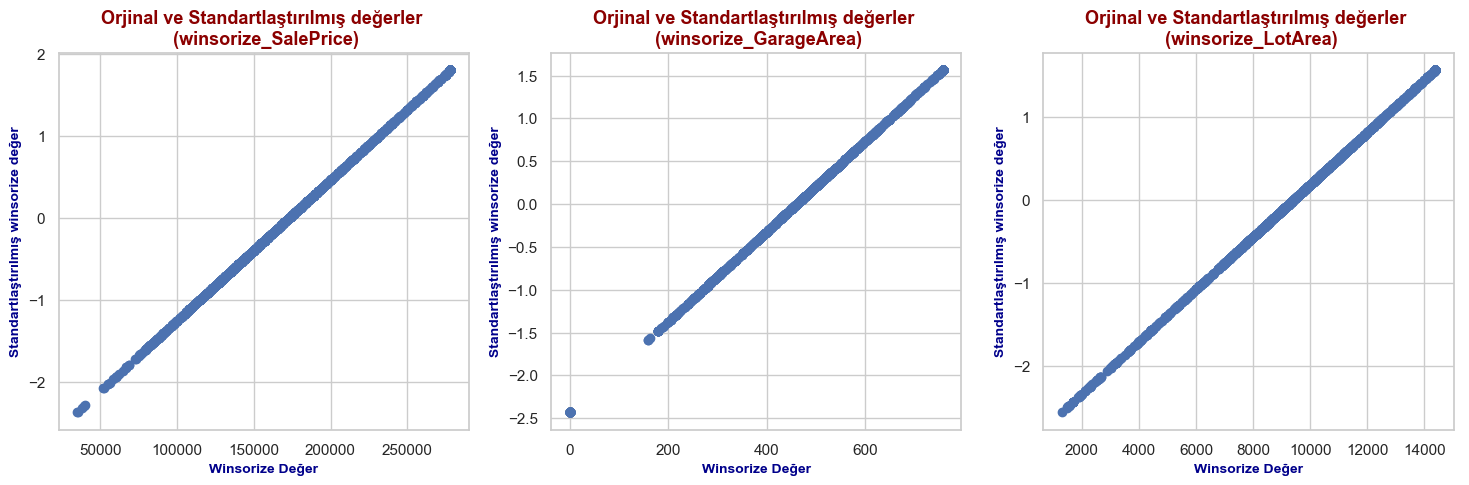

In [43]:
plt.figure(figsize=(18,5))

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.scatter(house[olcekli_ozellikler[2*i]], house[olcekli_ozellikler[2*i+1]])
    plt.title("Orjinal ve Standartlaştırılmış değerler \n ({})".format(olcekli_ozellikler[2*i]), fontdict=baslik_font)
    plt.xlabel("Winsorize Değer", fontdict=eksen_font)
    plt.ylabel("Standartlaştırılmış winsorize değer", fontdict=eksen_font)

## PCA

In [44]:
from sklearn.decomposition import PCA

x=house
pca=PCA(n_components=2, whiten=True)
pca.fit(x)

x_pca=pca.transform(x)

print("variance ratio: ", pca.explained_varience_ratio_)

print("sum: ", sum(pca.explained_varience_ratio_))

ValueError: could not convert string to float: 'RL'